In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [10]:
os.listdir()

['.ipynb_checkpoints', 'recorded_crime_ireland.csv', 'Untitled.ipynb']

In [12]:
data = pd.read_csv("recorded_crime_ireland.csv")

In [13]:
data.head


<bound method NDFrame.head of                                   STATISTIC Label Quarter  \
0       Recorded Crime Offences under Reservation  2003Q1   
1       Recorded Crime Offences under Reservation  2003Q1   
2       Recorded Crime Offences under Reservation  2003Q1   
3       Recorded Crime Offences under Reservation  2003Q1   
4       Recorded Crime Offences under Reservation  2003Q1   
...                                           ...     ...   
157047  Recorded Crime Offences under Reservation  2022Q3   
157048  Recorded Crime Offences under Reservation  2022Q3   
157049  Recorded Crime Offences under Reservation  2022Q3   
157050  Recorded Crime Offences under Reservation  2022Q3   
157051  Recorded Crime Offences under Reservation  2022Q3   

                       Garda Division  \
0       Cavan/Monaghan Garda Division   
1       Cavan/Monaghan Garda Division   
2       Cavan/Monaghan Garda Division   
3       Cavan/Monaghan Garda Division   
4       Cavan/Monaghan Garda Div

In [14]:
data


,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1
1,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0
2,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0
3,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0
4,Recorded Crime Offences under Reservation,2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1
...,...,...,...,...,...,...
157047,Recorded Crime Offences under Reservation,2022Q3,D.M.R. Western Garda Division,"Offences against government, justice procedure...",Number,329
157048,Recorded Crime Offences under Reservation,2022Q3,D.M.R. Western Garda Division,Offences against government and its agents,Number,6
157049,Recorded Crime Offences under Reservation,2022Q3,D.M.R. Western Garda Division,Organisation of crime and conspiracy to commit...,Number,0
157050,Recorded Crime Offences under Reservation,2022Q3,D.M.R. Western Garda Division,Perverting the course of justice,Number,0


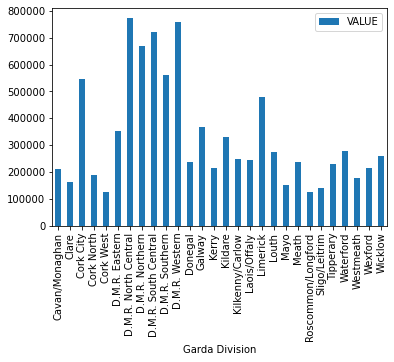

In [20]:
# Group the data by Garda Division and sum the values
group_data = data.groupby('Garda Division').sum()

# Remove ' Garda Division' from the end of each index label
group_data.index = group_data.index.str.replace(' Garda Division', '')

# Plot the data
group_data.plot(kind='bar', y='VALUE')

# Set the x-axis label
plt.xlabel('Garda Division')

# Display the plot
plt.show()


In [25]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Filter out 2020 data
data = data[data['Quarter'] != '2020Q1']
data = data[data['Quarter'] != '2020Q2']
data = data[data['Quarter'] != '2020Q3']
data = data[data['Quarter'] != '2020Q4']

# Group the data by quarter and sum the values
group_data = data.groupby('Quarter').sum()

# Extract the x and y data for the linear regression model
x_data = group_data.index.str.replace('Q', '.').astype(float).values.reshape(-1, 1)
y_data = group_data['VALUE'].values.reshape(-1, 1)

# Fit the linear regression model
model = LinearRegression().fit(x_data, y_data)

# Print the coefficients of the model
print('Slope: ', model.coef_[0])
print('Intercept: ', model.intercept_)

Slope:  [-1911.00286471]
Intercept:  [3964139.5590923]


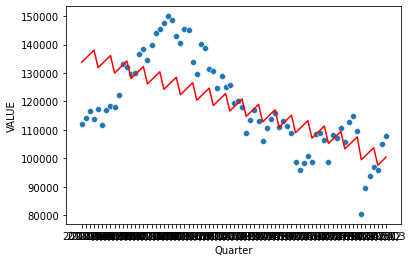

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by quarter and sum the values
group_data = data.groupby('Quarter').sum()

# Remove 2020 from the data
group_data = group_data[group_data.index != '2020Q1']
group_data = group_data[group_data.index != '2020Q2']
group_data = group_data[group_data.index != '2020Q3']
group_data = group_data[group_data.index != '2020Q4']

# Create a scatter plot of the data points
sns.scatterplot(x=group_data.index, y='VALUE', data=group_data)

# Fit a linear regression model to the data
X = [[int(q[:4]), int(q[5:])] for q in group_data.index]
y = group_data['VALUE']
model = LinearRegression().fit(X, y)

# Get the predicted values for the regression line
x_pred = [[year, quarter] for year in range(2003, 2023) for quarter in range(1, 5)]
y_pred = model.predict(x_pred)

# Plot the regression line on top of the scatter plot
plt.plot([q for q in group_data.index], model.predict(X), color='red')
plt.show()


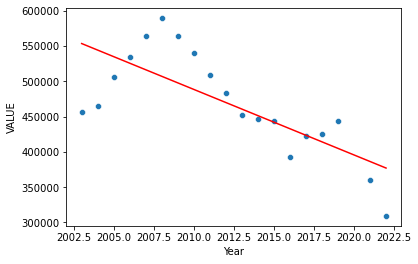

In [30]:
# Extract the year from the 'Quarter' column and create a new column
data['Year'] = data['Quarter'].apply(lambda x: int(x[:4]))

# Group data by year and sum the values
group_data = data.groupby('Year').sum()

# Remove 2020 from the data
group_data = group_data[group_data.index != 2020]

# Create a scatter plot of the data points
sns.scatterplot(x=group_data.index, y='VALUE', data=group_data)

# Fit a linear regression model to the data
X = [[year] for year in group_data.index]
y = group_data['VALUE']
model = LinearRegression().fit(X, y)

# Get the predicted values for the regression line
x_pred = [[year] for year in range(2003, 2023)]
y_pred = model.predict(x_pred)

# Plot the regression line on top of the scatter plot
plt.plot(x_pred, y_pred, color='red')
plt.show()


In [32]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [40]:
os.listdir()

['.ipynb_checkpoints',
 'Ireland.geojson.txt',
 'recorded_crime_ireland.csv',
 'Untitled.ipynb']

In [43]:
data.columns

Index(['Garda Division', 'Type of Offence', 'VALUE'], dtype='object')

In [14]:
garda_divisions = data['Garda Division'].unique()
garda_divisions

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [19]:
values = {
    'Fingal': 'D.M.R. North Central Garda Division',
    'Waterford City': 'Waterford Garda Division',
    'Kerry County': 'Kerry Garda Division',
    'Roscommon County': 'Roscommon/Longford Garda Division',
    'South Dublin': 'D.M.R. Eastern Garda Division',
    'Monaghan County': 'Cavan/Monaghan Garda Division',
    'Laois County': 'Laois/Offaly Garda Division',
    'Wexford County': 'Wexford Garda Division',
    'Limerick City': 'Limerick Garda Division',
    'Westmeath County': 'Westmeath Garda Division',
    'Dublin City': 'D.M.R. Southern Garda Division',
    'Clare County': 'Clare Garda Division',
    'Waterford County': 'Waterford Garda Division',
    'Limerick County': 'Limerick Garda Division',
    'South Tipperary': 'Tipperary Garda Division',
    'Galway City': 'Galway Garda Division',
    'Louth County': 'Louth Garda Division',
    'Kilkenny County': 'Kilkenny/Carlow Garda Division',
    'North Tipperary': 'Tipperary Garda Division',
    'Galway County': 'Galway Garda Division',
    'Kildare County': 'Kildare Garda Division',
    'Cavan County': 'Cavan/Monaghan Garda Division',
    'Leitrim County': 'Sligo/Leitrim Garda Division',
    'Sligo County': 'Sligo/Leitrim Garda Division',
    'Meath County': 'Meath Garda Division',
    'Offaly County': 'Laois/Offaly Garda Division',
    'Wicklow County': 'Wicklow Garda Division',
    'Longford County': 'Roscommon/Longford Garda Division',
    'DÃºn Laoghaire-Rathdown': 'D.M.R. Eastern Garda Division',
    'Donegal County': 'Donegal Garda Division',
    'Mayo County': 'Mayo Garda Division',
    'Carlow County': 'Kilkenny/Carlow Garda Division',
    'Cork City': 'Cork City Garda Division',
    'Cork County': 'Cork North Garda Division'
}


In [25]:
import json

def get_geojson_key_values(geojson_file, key_on):
    # Load GeoJSON file
    with open(geojson_file) as f:
        data = json.load(f)
    
    # Extract values for specified key_on property
    values = []
    for feature in data['features']:
        values.append(feature['properties'][key_on])
    
    # Return unique values
    return list(set(values))

values = get_geojson_key_values('map.geojson', 'name')
values

['Fingal',
 'Waterford City',
 'Kerry County',
 'Roscommon County',
 'South Dublin',
 'Monaghan County',
 'Laois County',
 'Wexford County',
 'Limerick City',
 'Westmeath County',
 'Dublin City',
 'Clare County',
 'Waterford County',
 'Limerick County',
 'South Tipperary',
 'Galway City',
 'Louth County',
 'Kilkenny County',
 'North Tipperary',
 'Galway County',
 'Kildare County',
 'Cavan County',
 'Leitrim County',
 'Sligo County',
 'Meath County',
 'Offaly County',
 'Wicklow County',
 'Longford County',
 'DÃºn Laoghaire-Rathdown',
 'Donegal County',
 'Mayo County',
 'Carlow County',
 'Cork City',
 'Cork County']

In [44]:
# Step 1: Import libraries
import pandas as pd
import folium
import json

# Define dictionary to match locations
locations_dict = {
    'Cavan/Monaghan Garda Division': 'Cavan County',
    'Donegal Garda Division': 'Donegal County',
    'Sligo/Leitrim Garda Division': 'Leitrim County',
    'Louth Garda Division': 'Louth County',
    'Clare Garda Division': 'Clare County',
    'Mayo Garda Division': 'Mayo County',
    'Galway Garda Division': 'Galway County',
    'Roscommon/Longford Garda Division': 'Roscommon County',
    'Cork City Garda Division': 'Cork City',
    'Cork North Garda Division': 'Cork County',
    'Cork West Garda Division': 'Cork County',
    'Kerry Garda Division': 'Kerry County',
    'Limerick Garda Division': 'Limerick County',
    'Laois/Offaly Garda Division': 'Laois County',
    'Meath Garda Division': 'Meath County',
    'Wicklow Garda Division': 'Wicklow County',
    'Westmeath Garda Division': 'Westmeath County',
    'Kildare Garda Division': 'Kildare County',
    'Tipperary Garda Division': 'North Tipperary',
    'Wexford Garda Division': 'Wexford County',
    'Kilkenny/Carlow Garda Division': 'Kilkenny County',
    'Waterford Garda Division': 'Waterford County',
    'D.M.R. South Central Garda Division': 'Dublin City',
    'D.M.R. North Central Garda Division': 'Fingal',
    'D.M.R. Northern Garda Division': 'Dublin City',
    'D.M.R. Southern Garda Division': 'Dublin City',
    'D.M.R. Eastern Garda Division': 'Dún Laoghaire-Rathdown',
    'D.M.R. Western Garda Division': 'Dublin City'
}

# Step 2: Read in CSV file
data = pd.read_csv('recorded_crime_ireland.csv')

# Step 3: Map locations to matching dictionary
data['Garda Division'] = data['Garda Division'].replace(locations_dict)
# Step 4: Aggregate data by geographic area
area_data = data.groupby('Garda Division')['VALUE'].sum().reset_index()

# Step 5: Create Folium map
map = folium.Map(location=[53.5, -8], zoom_start=7)

# Step 6: Add choropleth layer to map
geojson_data = json.load(open('map.geojson'))

folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=area_data,
    columns=['Garda Division', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime count'
).add_to(map)

# Step 7: Customize map settings
folium.LayerControl().add_to(map)
map.save('crime_map.html')
